In [1]:
#Load libraries

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from scipy import stats
import seaborn as sns

In [4]:
#Load document as 'fifa'

In [5]:
fifa = pd.read_csv('fifa_data.csv')

In [6]:
#Print off sample data

In [7]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [45]:
#Count total number of player

In [46]:
fifa.ID.count()

18207

In [8]:
#Chart 'overall' score

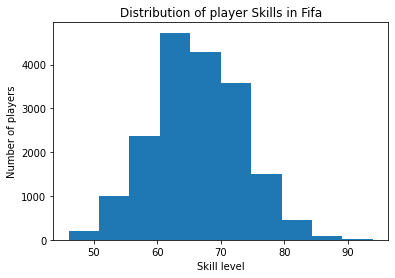

In [26]:
plt.ylabel('Number of players')
plt.xlabel('Skill level')
plt.title('Distribution of player Skills in Fifa')

plt.hist(fifa.Overall)
plt.show()

In [10]:
#Chart 'age'

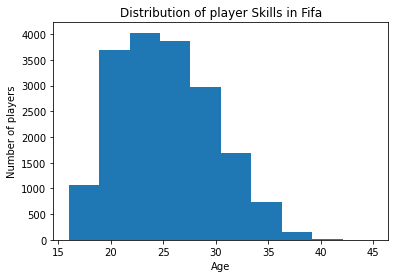

In [27]:
plt.ylabel('Number of players')
plt.xlabel('Age')
plt.title('Distribution of player Skills in Fifa')

plt.hist(fifa.Age)
plt.show()

In [13]:
#Comparing age of players with skill level 

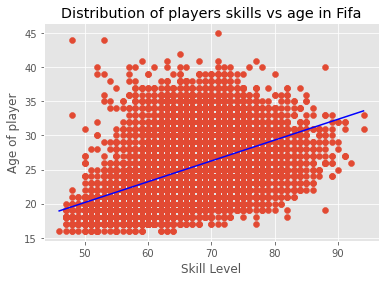

In [177]:
plt.ylabel('Age of player')
plt.xlabel('Skill Level')
plt.title('Distribution of players skills vs age in Fifa')

x = fifa.Overall
y =  fifa.Age

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel, 'b')
plt.show()


In [28]:
#chart which foot players use 

In [29]:
#Print foot preference 

In [30]:
fifa['Preferred Foot']

0         Left
1        Right
2        Right
3        Right
4        Right
         ...  
18202    Right
18203    Right
18204    Right
18205    Right
18206    Right
Name: Preferred Foot, Length: 18207, dtype: object

In [31]:
#Count preference 

In [32]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]
print(left)
print(right)

4211
13948


In [33]:
# Chart data

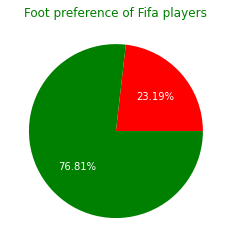

In [34]:
labels = ['Left','Right']
colors = ['r', 'g']

plt.pie([left, right], labels = labels, textprops={'color':"w"}, colors=colors, autopct='%.2f%%')
plt.title('Foot preference of Fifa players', color='g')
plt.show()

In [35]:
#chart overall score with age and show prefered foot

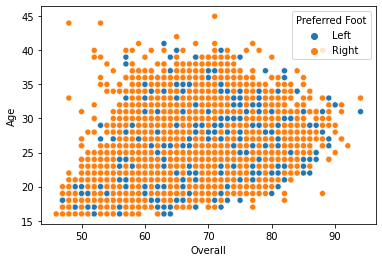

In [39]:
sns.scatterplot(x=fifa.Overall, y=fifa.Age, hue=fifa['Preferred Foot'])
plt.show()

In [47]:
#Print weight of players

In [48]:
fifa.Weight

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [49]:
#remove lbs from data

In [50]:
fifa.Weight = [int(x.strip('lbs')) if type (x)==str else x for x in fifa.Weight]

In [52]:
#Reprint to see result

In [53]:
fifa.Weight

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [54]:
#Create groups for weight class

In [56]:
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125 )& (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150 )& (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175 )& (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[(fifa.Weight >= 200)].count()[0]

In [57]:
light

369

In [58]:
light_medium

2290

In [59]:
medium

10876

In [60]:
medium_heavy

4583

In [61]:
heavy

369

In [62]:
#print pie chart

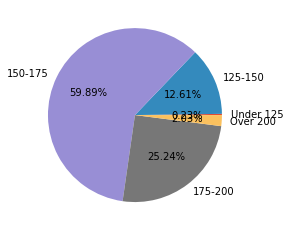

In [63]:
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

plt.style.use('ggplot')

plt.pie(weights, labels = labels, autopct='%.2f%%')
plt.show()

In [64]:
#Add style

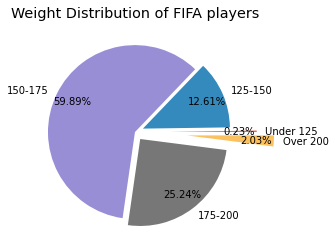

In [65]:
weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']

plt.style.use('ggplot')

explode = (.4, .1, .0, .1, .6)

plt.title('Weight Distribution of FIFA players')

plt.pie(weights, labels = labels, autopct='%.2f%%', pctdistance = 0.8, explode=explode)
plt.show()

In [68]:
#Print Distribution of weight

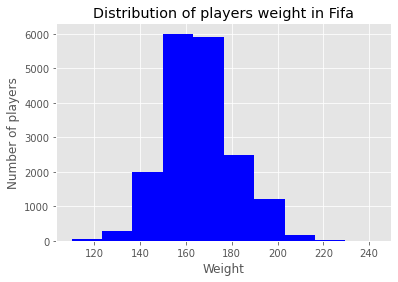

In [67]:
plt.hist(fifa.Weight, color='b')
plt.ylabel('Number of players')
plt.xlabel('Weight')
plt.title('Distribution of players weight in Fifa')

plt.show()

In [ ]:
#Make new variable to look at players over 35 

In [107]:
age35 = fifa.loc[fifa['Age'] >= 35]
age35.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
41,41,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,...,70.0,13.0,11.0,11.0,88.0,87.0,74.0,90.0,83.0,€7.4M
102,102,171919,Naldo,35,https://cdn.sofifa.org/players/4/19/171919.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,FC Schalke 04,...,84.0,86.0,88.0,85.0,14.0,10.0,14.0,8.0,14.0,€15.3M
108,108,120533,Pepe,35,https://cdn.sofifa.org/players/4/19/120533.png,Portugal,https://cdn.sofifa.org/flags/38.png,85,85,Beşiktaş JK,...,79.0,86.0,85.0,82.0,8.0,15.0,5.0,9.0,10.0,€17.1M
109,109,41236,Z. Ibrahimović,36,https://cdn.sofifa.org/players/4/19/41236.png,Sweden,https://cdn.sofifa.org/flags/46.png,85,85,LA Galaxy,...,90.0,28.0,37.0,24.0,13.0,15.0,10.0,9.0,12.0,€21M
152,152,137186,A. Barzagli,37,https://cdn.sofifa.org/players/4/19/137186.png,Italy,https://cdn.sofifa.org/flags/27.png,84,84,Juventus,...,88.0,94.0,90.0,82.0,4.0,2.0,4.0,2.0,4.0,€6.9M


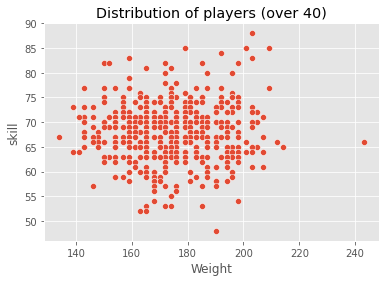

In [108]:
plt.title('Distribution of players (over 40)')
plt.ylabel('skill')
plt.xlabel('Weight')


sns.scatterplot(x=age35.Weight, y=age35.Overall)
plt.show()

In [109]:
#graph goalkeeper Vision and Reactions who are age > 35

In [134]:
goalie_C = fifa.loc[fifa.Position == 'GK'].count()[0]
goalie_C

2025

In [142]:
goalie  = fifa.loc[fifa['Position'] == 'GK']
goalie_35 = age35.loc[age35['Age'] >= 35]
goalie_35.count()

Unnamed: 0        367
ID                367
Name              367
Age               367
Photo             367
                 ... 
GKHandling        367
GKKicking         367
GKPositioning     367
GKReflexes        367
Release Clause    354
Length: 89, dtype: int64

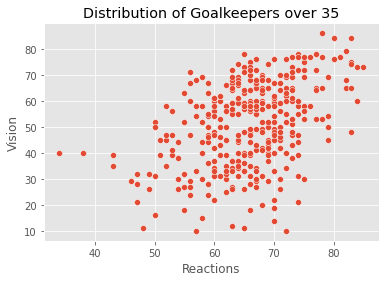

In [144]:
plt.title('Distribution of Goalkeepers over 35')
plt.ylabel('')
plt.xlabel('')

sns.scatterplot(x=goalie_35.Reactions, y=goalie_35.Vision)
plt.show()

In [148]:
#Get Aus data

In [149]:
fifa.Nationality

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [150]:
Aus = fifa.loc[fifa['Nationality'] == 'Australia'].count()[0]
Aus

236

In [152]:
Aus = fifa.loc[(fifa.Nationality == 'Australia')]
Aus.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
647,647,199005,M. Ryan,26,https://cdn.sofifa.org/players/4/19/199005.png,Australia,https://cdn.sofifa.org/flags/195.png,79,81,Brighton & Hove Albion,...,64.0,10.0,20.0,17.0,81.0,74.0,82.0,78.0,83.0,€20.7M
1290,1290,207928,T. Rogić,25,https://cdn.sofifa.org/players/4/19/207928.png,Australia,https://cdn.sofifa.org/flags/195.png,76,79,Celtic,...,83.0,46.0,48.0,41.0,12.0,11.0,13.0,12.0,11.0,€17.8M
1789,1789,165735,B. Jones,36,https://cdn.sofifa.org/players/4/19/165735.png,Australia,https://cdn.sofifa.org/flags/195.png,75,75,Al Nassr,...,56.0,17.0,13.0,13.0,75.0,69.0,69.0,80.0,75.0,€1.5M
2005,2005,195033,M. Leckie,27,https://cdn.sofifa.org/players/4/19/195033.png,Australia,https://cdn.sofifa.org/flags/195.png,75,75,Hertha BSC,...,67.0,63.0,48.0,40.0,8.0,10.0,8.0,6.0,10.0,€11.9M
2136,2136,205347,M. Luongo,25,https://cdn.sofifa.org/players/4/19/205347.png,Australia,https://cdn.sofifa.org/flags/195.png,74,77,Queens Park Rangers,...,63.0,64.0,77.0,74.0,15.0,13.0,9.0,14.0,6.0,€11.9M


In [154]:
#Print Aus player overall  and skill level

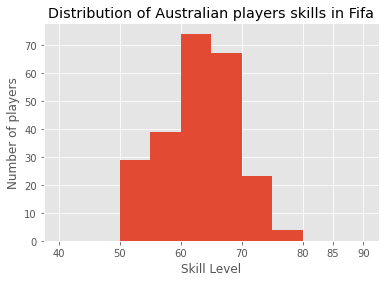

In [156]:
bins = [40,45,50,55,60,65,70,75,80,85,90]
bins2 = [40,50,60,70,80,85,90]

plt.hist(Aus.Overall, bins=bins)
plt.ylabel('Number of players')
plt.xlabel('Skill Level')
plt.title('Distribution of Australian players skills in Fifa')
plt.xticks(bins2)
plt.show()

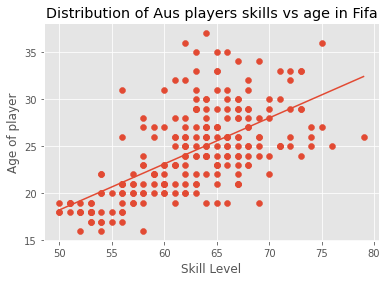

In [179]:
plt.ylabel('Age of player')
plt.xlabel('Skill Level')
plt.title('Distribution of Aus players skills vs age in Fifa')

x = Aus.Overall
y =  Aus.Age

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [157]:
#Melb victory data

In [158]:
MVFC = fifa.loc[fifa['Club'] == 'Melbourne Victory'].count()[0]
MVFC

21

In [159]:
MVFC = fifa.loc[(fifa.Club == 'Melbourne Victory')]
MVFC.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
873,873,186581,K. Honda,32,https://cdn.sofifa.org/players/4/19/186581.png,Japan,https://cdn.sofifa.org/flags/163.png,78,78,Melbourne Victory,...,80.0,59.0,48.0,48.0,3.0,3.0,5.0,5.0,3.0,€10M
1886,1886,176794,O. Toivonen,31,https://cdn.sofifa.org/players/4/19/176794.png,Sweden,https://cdn.sofifa.org/flags/46.png,75,75,Melbourne Victory,...,75.0,31.0,37.0,39.0,9.0,8.0,14.0,12.0,6.0,€7.5M
5032,5032,182091,K. Barbarouses,28,https://cdn.sofifa.org/players/4/19/182091.png,New Zealand,https://cdn.sofifa.org/flags/198.png,70,70,Melbourne Victory,...,60.0,28.0,29.0,22.0,8.0,11.0,12.0,13.0,9.0,€2.2M
5364,5364,172208,J. Troisi,29,https://cdn.sofifa.org/players/4/19/172208.png,Australia,https://cdn.sofifa.org/flags/195.png,70,70,Melbourne Victory,...,68.0,22.0,40.0,38.0,12.0,10.0,14.0,6.0,13.0,€2.2M
5945,5945,200535,T. Antonis,24,https://cdn.sofifa.org/players/4/19/200535.png,Australia,https://cdn.sofifa.org/flags/195.png,69,70,Melbourne Victory,...,70.0,57.0,60.0,53.0,7.0,15.0,16.0,14.0,15.0,€1.6M


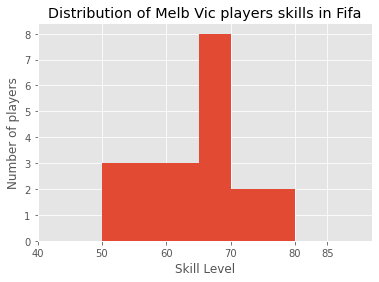

In [161]:
bins = [50,55,60,65,70,75,80,85,90]
bins2 = [40,50,60,70,80,85]

plt.hist(MVFC.Overall, bins=bins)
plt.ylabel('Number of players')
plt.xlabel('Skill Level')
plt.title('Distribution of Melb Vic players skills in Fifa')
plt.xticks(bins2)
plt.show()

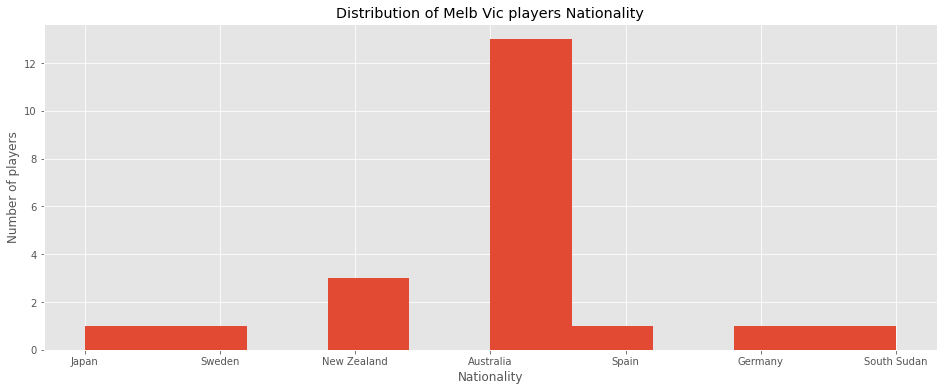

In [175]:
plt.figure(figsize=(16, 6))

plt.hist(MVFC.Nationality)
plt.ylabel('Number of players')
plt.xlabel('Nationality')
plt.title('Distribution of Melb Vic players Nationality')
plt.show()

In [180]:
# compare different teams 

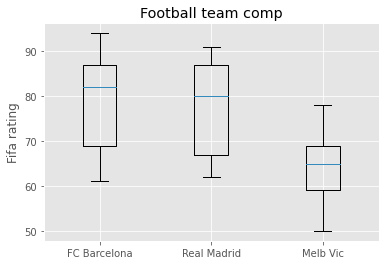

In [181]:
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']    
mvfc = fifa.loc[fifa.Club == 'Melbourne Victory']['Overall']  

labels = ['FC Barcelona' , 'Real Madrid', 'Melb Vic']

plt.title('Football team comp')
plt.ylabel('Fifa rating')

plt.boxplot([barcelona,madrid,mvfc], labels = labels)
plt.show()

In [183]:
Melbourne1 = fifa.loc[fifa['Club'] == 'Melbourne Victory']
Adelaide = fifa.loc[fifa['Club'] == 'Adelaide United']
Brisbane = fifa.loc[fifa['Club'] == 'Brisbane Roar']
Tottenham = fifa.loc[fifa['Club'] == 'Tottenham Hotspur']

A_L  = [Melbourne1, Adelaide, Brisbane,Tottenham]
A_L_Teams = pd.concat(A_L)

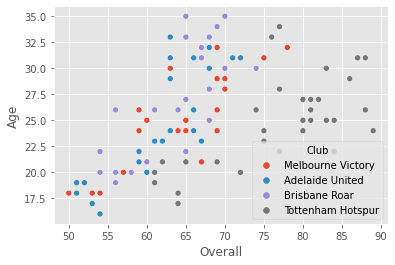

In [185]:
sns.scatterplot(x=A_L_Teams.Overall, y=A_L_Teams.Age, hue=A_L_Teams['Club'])
#Save graph
plt.savefig('team_compare.png')